ex2

In [26]:
import numpy as np
import pandas as pd
data = pd.read_csv('data.csv',encoding='utf-8',index_col = 0)
data_corr = data.iloc[:,0:7]
data_sigma = pd.DataFrame(data.iloc[:,8])
data_w = pd.DataFrame(data.iloc[:,9])
N = 7
list_sigma = np.multiply(np.multiply((data_sigma.values@np.ones((N,1)).T),data_corr.values),(np.ones((N,1))@data_sigma.values.T))

In [27]:
# (1)
mu_0 = 3.5*(list_sigma@data_w.values)
pd.DataFrame(data=np.around(mu_0,4),columns=['mu_0'],index=data_w.index)

,mu_0
Australia,0.0551
Canada,0.0968
France,0.1170
Germany,0.1264
Japan,0.0602
UK,0.0947
US,0.1058


In [28]:
# (2)
gamma,tau = 2,0.03
mu_0 = gamma*(list_sigma@data_w.values)
mu_hat = mu_0
sigma_hat    = list_sigma+tau*list_sigma

w0 = np.linalg.inv(gamma*sigma_hat)@ mu_hat
exb = pd.concat([pd.DataFrame(w0,index = data_w.index,columns=['w_0']),data_w],axis=1)
exb['w_0-w_eq'] = exb['w_0']-exb['w']
exb

,w_0,w,w_0-w_eq
Australia,0.015534,0.016,-0.000466
Canada,0.021359,0.022,-0.000641
France,0.050485,0.052,-0.001515
Germany,0.053398,0.055,-0.001602
Japan,0.112621,0.116,-0.003379
UK,0.120388,0.124,-0.003612
US,0.597087,0.615,-0.017913


In [29]:
# (3)
w_france = -data_w.iloc[2].values/(data_w.iloc[2].values+data_w.iloc[5].values)
P1 = np.array([0,0,float(w_france),1,0,float(-1-w_france),0]) #germany vs france+uk
P2 = np.array([0,1,0,0,0,0,-1]) #canadian vs U.S.
P = np.vstack((P1,P2))
q = np.array([0.045,0.02]).reshape((2,1))
omega_0 = tau*list_sigma
Omega = np.diag(np.array([0.025,0.015])*tau)

    
#Black- Litterman formula,derive the posterior distribution of the mean return
mu_hat = mu_0+(omega_0@P.T) @ np.linalg.inv((P@omega_0)@P.T+Omega) @ (q-P@mu_0)
omega_hat  = omega_0- (omega_0@P.T) @ np.linalg.inv(P@(omega_0@P.T)+Omega) @ (P@omega_0)

print('mu_hat(posterior distribution of the mean return)')
display(pd.DataFrame(mu_hat,index = data_w.index,columns=['w_0']))
print('sigma_hat matrix:')
display(pd.DataFrame(omega_hat,columns=data_w.index,index=data_w.index))

# formula in slide 11
invOmega0  = np.linalg.inv(omega_0)
invOmega   = np.linalg.inv(Omega)

mu_hat2    = np.linalg.inv(np.linalg.inv(omega_0)+P.T@np.linalg.inv(Omega)@P) @ (np.linalg.inv(omega_0)@mu_0 + P.T@np.linalg.inv(Omega)@q)
omega_hat2 = np.linalg.inv(np.linalg.inv(omega_0)+P.T@np.linalg.inv(Omega)@P)
print('result from slide 11')
print('mu_hat(posterior distribution of the mean return)')
display(pd.DataFrame(mu_hat2,index = data_w.index,columns=['w_0']))
print('sigma_hat matrix:')
display(pd.DataFrame(omega_hat2,columns=data_w.index,index=data_w.index))
print('they are the same')


mu_hat(posterior distribution of the mean return)


,w_0
Australia,0.035633
Canada,0.069527
France,0.076466
Germany,0.091226
Japan,0.037018
UK,0.055914
US,0.060715


sigma_hat matrix:


,Australia,Canada,France,Germany,Japan,UK,US
Australia,0.000750,0.000436,0.000526,0.000579,0.000432,0.000483,0.000423
Canada,0.000436,0.001067,0.000913,0.000911,0.000370,0.000725,0.000909
France,0.000526,0.000913,0.001743,0.001520,0.000531,0.001145,0.000886
Germany,0.000579,0.000911,0.001520,0.001739,0.000556,0.001221,0.000885
Japan,0.000432,0.000370,0.000531,0.000556,0.001317,0.000506,0.000354
UK,0.000483,0.000725,0.001145,0.001221,0.000506,0.001196,0.000722
US,0.000423,0.000909,0.000886,0.000885,0.000354,0.000722,0.000989


result from slide 11
mu_hat(posterior distribution of the mean return)


,w_0
Australia,0.035633
Canada,0.069527
France,0.076466
Germany,0.091226
Japan,0.037018
UK,0.055914
US,0.060715


sigma_hat matrix:


,Australia,Canada,France,Germany,Japan,UK,US
Australia,0.000750,0.000436,0.000526,0.000579,0.000432,0.000483,0.000423
Canada,0.000436,0.001067,0.000913,0.000911,0.000370,0.000725,0.000909
France,0.000526,0.000913,0.001743,0.001520,0.000531,0.001145,0.000886
Germany,0.000579,0.000911,0.001520,0.001739,0.000556,0.001221,0.000885
Japan,0.000432,0.000370,0.000531,0.000556,0.001317,0.000506,0.000354
UK,0.000483,0.000725,0.001145,0.001221,0.000506,0.001196,0.000722
US,0.000423,0.000909,0.000886,0.000885,0.000354,0.000722,0.000989


they are the same


In [30]:
# (4)
Lambda = 1/gamma * np.linalg.inv((P@list_sigma)@P.T+(1+1/tau)*Omega) @ (q-1/(1+tau)*(P@mu_0))
w_star = w0+P.T@Lambda
exd = pd.concat([pd.DataFrame(w_star,index = data_w.index,columns=['w*']),pd.DataFrame(w0,index = data_w.index,columns=['w0']),data_w],axis=1).rename(columns={'w':'w_eq'})
exd['w*-w0'] = exd['w*'] - exd['w0']
exd['w*-w_eq'] = exd['w*'] - exd['w_eq']
exd

,w*,w0,w_eq,w*-w0,w*-w_eq
Australia,0.015534,0.015534,0.016,0.000000,-0.000466
Canada,0.386836,0.021359,0.022,0.365477,0.364836
France,-0.042559,0.050485,0.052,-0.093045,-0.094559
Germany,0.368318,0.053398,0.055,0.314920,0.313318
Japan,0.112621,0.112621,0.116,0.000000,-0.003379
UK,-0.101487,0.120388,0.124,-0.221875,-0.225487
US,0.231610,0.597087,0.615,-0.365477,-0.383390


In [31]:
# (5)
print('lambda_1 and lambda2 value:')
print(Lambda[0],Lambda[1])

lambda_1 and lambda2 value:
[0.31491995] [0.36547704]


,w*
Australia,0.015534
Canada,0.383102
France,-0.040714
Germany,0.362072
Japan,0.224265
UK,-0.097086
US,0.235344


lambda_1, lambda2 and lambda3 value:
[0.3086738] [0.36174319] [0.11164396]


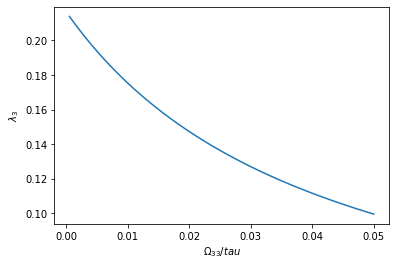

In [32]:
# (6)
import matplotlib.pyplot as plt
P1 = np.array([0,0,float(w_france),1,0,float(-1-w_france),0]) #germany vs france+uk
P2 = np.array([0,1,0,0,0,0,-1]) #canadian vs U.S.
P3 = np.array([0,0,0,0,1,0,0]) #japan
P = np.vstack((P1,P2,P3))
q = np.array([0.045,0.02,0.055]).reshape((3,1))
Omega = np.diag(np.array([0.025,0.015,0.04])*tau)

mu_hat = mu_0+(omega_0@P.T) @ np.linalg.inv((P@omega_0)@P.T+Omega) @ (q-P@mu_0)
omega_hat  = omega_0- (omega_0@P.T) @ np.linalg.inv(P@(omega_0@P.T)+Omega) @ (P@omega_0)

Lambda = 1/gamma * np.linalg.inv((P@list_sigma)@P.T+(1+1/tau)*Omega) @ (q-1/(1+tau)*(P@mu_0))
w_star = w0+P.T@Lambda
display(pd.DataFrame(w_star,index = data_w.index,columns=['w*']))
print('lambda_1, lambda2 and lambda3 value:')
print(Lambda[0],Lambda[1],Lambda[2])

L3 = []
o33_list =[]
for i in range(1,101):
    o33 = 0.0005*i
    o33_list.append(o33)
    Omega = np.diag(np.array([0.025,0.015,o33])*tau)
    mu_hat = mu_0+(omega_0@P.T) @ np.linalg.inv((P@omega_0)@P.T+Omega) @ (q-P@mu_0)
    omega_hat  = omega_0- (omega_0@P.T) @ np.linalg.inv(P@(omega_0@P.T)+Omega) @ (P@omega_0)

    Lambda = 1/gamma * np.linalg.inv((P@list_sigma)@P.T+(1+1/tau)*Omega) @ (q-1/(1+tau)*(P@mu_0))
    w_star = w0+P.T@Lambda
    L3.append(Lambda[2].tolist()[0])

plt.plot(o33_list,L3)
plt.xlabel('$\Omega_{33}/tau$')
plt.ylabel('$\lambda_3$')
plt.show()
